<a href="https://colab.research.google.com/github/KenzaChraibi/Devoir-ML1/blob/main/Devoir_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Général

In [1]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

#Récupérer les données pour la classification
!rm -rf Devoir-ML1/
!git clone https://github.com/KenzaChraibi/Devoir-ML1

#Loader les données pour la classification
data = np.load("/content/Devoir-ML1/a22_devoir_q2-classification.npz")
X = data["X"]
y = data["y"]

Cloning into 'Devoir-ML1'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 2), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (12/12), done.


# Question 2 : Classification

## Question 2.1

[Text(0.5, 1.0, 'Exploration visuelle des données')]

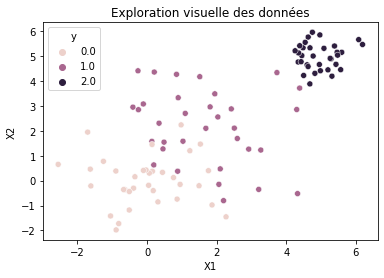

In [3]:
# Visualisation
df = pd.DataFrame(np.column_stack((X,y)), columns = ['X1','X2','y'])
#fig, (ax1, ax2) = plt.subplots(1, 2)
#ax1.scatter(X[:,0],X[:,1])
#sns.scatterplot(ax=ax2, x="X1", y="X2", data=df, hue="y")
sns.scatterplot(x="X1", y="X2", data=df, hue="y").set(title='Exploration visuelle des données')

## Question 2.2

In [4]:
#Diviser l'échantillon en 3
from sklearn.model_selection import train_test_split
X_train, X_VT, y_train, y_VT = train_test_split(
    X, y, test_size=0.4, random_state=1234)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_VT, y_VT, test_size=0.5, random_state=1234)
#Vérifier la séparation
print(len(X_train),len(X_valid),len(X_test))

60 20 20


In [189]:
#Entraîner un SVM
from sklearn.svm import SVC
a=0
acc_train=[]
acc_valid=[]
for i in [0.001, 0.01, 0.1, 1, 10]:
  model = SVC(kernel='linear', C=i)
  model.fit(X_train, y_train)
  acc_train.append((sum(model.predict(X_train)==y_train)/len(y_train))*100)
  acc_valid.append((sum(model.predict(X_valid)==y_valid)/len(y_valid)) *100) 
  print("Accuracy train for C= ",i," : ", "{:.2f}".format(acc_train[a]), "%")
  print("Accuracy valid for C= ",i," : ", "{:.2f}".format(acc_valid[a]), "%")
  a+=1

Accuracy train for C=  0.001  :  38.33 %
Accuracy valid for C=  0.001  :  25.00 %
Accuracy train for C=  0.01  :  86.67 %
Accuracy valid for C=  0.01  :  85.00 %
Accuracy train for C=  0.1  :  88.33 %
Accuracy valid for C=  0.1  :  85.00 %
Accuracy train for C=  1  :  88.33 %
Accuracy valid for C=  1  :  85.00 %
Accuracy train for C=  10  :  90.00 %
Accuracy valid for C=  10  :  85.00 %


In [202]:
# Entraîner le meilleur SVM sur l'ensemble de test
model = SVC(kernel='linear', C=10)
model.fit(X_train,y_train)
acc = (sum(model.predict(X_test)==y_test)/len(y_test))*100
print('Le taux de bonne classification du meilleur modèle pour le test est ', 
      "{:.2f}".format(acc),'%')

Le taux de bonne classification du meilleur modèle pour le test est  85.00 %


## Question 2.3

In [203]:
# Combiner les datasets train et valid pour la validation croisée
X_cv = np.row_stack((X_train, X_valid))
y_cv = np.concatenate((y_train,y_valid))

# Entraîner un SVM par CV
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

for i in [0.001, 0.01, 0.1, 1, 10]:
  model = SVC(kernel='linear', C=i)
  cv_score = cross_validate(model, X_cv, y_cv, cv=10, 
                            scoring='accuracy',return_train_score=True)
  print('Mean train accuracy for C= ',i,' : ', "{:.4f}".format(np.mean(cv_score['train_score'])))
  print('Mean valid accuracy for C= ',i,' : ', "{:.4f}".format(np.mean(cv_score['test_score'])))
  

Mean train accuracy for C=  0.001  :  0.5472
Mean valid accuracy for C=  0.001  :  0.5250
Mean train accuracy for C=  0.01  :  0.8819
Mean valid accuracy for C=  0.01  :  0.8750
Mean train accuracy for C=  0.1  :  0.8889
Mean valid accuracy for C=  0.1  :  0.8750
Mean train accuracy for C=  1  :  0.8903
Mean valid accuracy for C=  1  :  0.8750
Mean train accuracy for C=  10  :  0.9028
Mean valid accuracy for C=  10  :  0.8750


In [214]:
# Obtenir les prédictions pour l'ensemble de test
# Meilleur modèle avec C=10
model = SVC(kernel='linear', C=10)
cv_score = cross_validate(model, X_cv, y_cv, cv=10, 
             scoring='accuracy',return_train_score=True, return_estimator=True)
# Obtenir 10 prédictions par exemple, soit 1 par modèle du 10-fold
pred = np.ones((10,20))
for i in np.arange(0,10,1):
  pred[i] = cv_score['estimator'][i].predict(X_test)
pred = pred.T #Chaque ligne contient les 10 prédictions pour un même exemple

# Parcourir les 20 exemples du test pour déterminer la classe majoritaire
test_pred = np.ones(20)
for a in np.arange(0,20,1):
  values, counts = np.unique(pred[a], return_counts=True)
  test_pred[a] = values[np.argmax(counts)]#Classe majoritaire par exemple

acc = (sum(test_pred==y_test)/len(y_test))*100
print('Le taux de bonne classification du meilleur modèle pour le test est ', 
      "{:.2f}".format(acc),'%')

Le taux de bonne classification du meilleur modèle pour le test est  95.00 %


# Question 3 : Régression

## Pré-traitement des données

In [104]:
# Loader les données de régression
df = pd.read_csv('/content/Devoir-ML1/reviews.tsv', sep='\t', header=None)
df.columns = ['Review', 'Critic']

#Enlever les nan
from numpy import nan
Critic = [item for item in df.Critic if not(pd.isnull(item)) == True]
Review = df.Review[pd.isnull(df.Critic)==False]

In [105]:
#Diviser l'échantillon en 3
from sklearn.model_selection import train_test_split
X_train, X_VT, y_train, y_VT = train_test_split(
    Critic, Review, test_size=0.2, random_state=1234)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_VT, y_VT, test_size=0.5, random_state=1234)
#Vérifier la séparation
print(len(X_train),len(X_valid),len(X_test))

7994 999 1000


In [118]:
# Représentation Bag-of-words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000,stop_words="english")
X_trainB = vectorizer.fit_transform(X_train)
X_validB = vectorizer.fit_transform(X_valid)
X_testB = vectorizer.fit_transform(X_test)

# Vérifier le nombre de mots conservés
vectorizer.get_feature_names_out().shape

(2000,)

## Algorithme K-NN